In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from lifelines import WeibullFitter, LogNormalFitter, LogLogisticFitter, KaplanMeierFitter
from lifelines import WeibullAFTFitter, LogNormalAFTFitter, LogLogisticAFTFitter

In [2]:
telco = pd.read_csv('telco.csv')
telco.head()

,ID,region,tenure,age,marital,address,income,ed,retire,gender,voice,internet,forward,custcat,churn
0,1,Zone 2,13,44,Married,9,64,College degree,No,Male,No,No,Yes,Basic service,Yes
1,2,Zone 3,11,33,Married,7,136,Post-undergraduate degree,No,Male,Yes,No,Yes,Total service,Yes
2,3,Zone 3,68,52,Married,24,116,Did not complete high school,No,Female,No,No,No,Plus service,No
3,4,Zone 2,33,33,Unmarried,12,33,High school degree,No,Female,No,No,No,Basic service,Yes
4,5,Zone 2,23,30,Married,9,30,Did not complete high school,No,Male,No,No,Yes,Plus service,No


# Categorical features


In [3]:
# Turning some of the features into categorical

cols = ['region','ed','marital','retire', 'gender','internet','forward','voice', 'custcat', 'churn']

categorical_df = pd.get_dummies(telco,
               columns=cols,
               prefix=cols,
               drop_first=False)

categorical_df.head()

,ID,tenure,age,address,income,region_Zone 1,region_Zone 2,region_Zone 3,ed_College degree,ed_Did not complete high school,...,forward_No,forward_Yes,voice_No,voice_Yes,custcat_Basic service,custcat_E-service,custcat_Plus service,custcat_Total service,churn_No,churn_Yes
0,1,13,44,9,64,False,True,False,True,False,...,False,True,True,False,True,False,False,False,False,True
1,2,11,33,7,136,False,False,True,False,False,...,False,True,False,True,False,False,False,True,False,True
2,3,68,52,24,116,False,False,True,False,True,...,True,False,True,False,False,False,True,False,True,False
3,4,33,33,12,33,False,True,False,False,False,...,True,False,True,False,True,False,False,False,False,True
4,5,23,30,9,30,False,True,False,False,True,...,False,True,True,False,False,False,True,False,True,False


In [4]:
categorical_df.columns

Index(['ID', 'tenure', 'age', 'address', 'income', 'region_Zone 1',
       'region_Zone 2', 'region_Zone 3', 'ed_College degree',
       'ed_Did not complete high school', 'ed_High school degree',
       'ed_Post-undergraduate degree', 'ed_Some college', 'marital_Married',
       'marital_Unmarried', 'retire_No', 'retire_Yes', 'gender_Female',
       'gender_Male', 'internet_No', 'internet_Yes', 'forward_No',
       'forward_Yes', 'voice_No', 'voice_Yes', 'custcat_Basic service',
       'custcat_E-service', 'custcat_Plus service', 'custcat_Total service',
       'churn_No', 'churn_Yes'],
      dtype='object')

Some columns in the dataset needed to be treated as categorical variables.So, these columns were converted into categorical data types, resulting in the addition of dummy columns to the dataframe. Each dummy column represents a level within the categorical variable. In order to prevent problems with multicollinearity and enable additional analysis, one level from each categorical variable was selected as a reference. It serves as a baseline for measuring the effects of the other levels within the variable.


Example
The categorical variable 'gender' comprises two levels: 'Male' and 'Female.' In order to do the analysis, just one level—let's call it "gender_Male"—was kept in the dataframe and "gender_Female" was omitted.  This process was repeated for other categorical variables with multiple levels.

In [5]:
df = categorical_df[[ 'tenure', 'age', 'income',
                     'region_Zone 2', 'region_Zone 3',
                     'marital_Married', 'churn_Yes',
                     'ed_Did not complete high school', 'ed_High school degree',
                     'ed_Post-undergraduate degree', 'ed_Some college',
                     'voice_Yes', 'retire_Yes', 'gender_Male',
                    'internet_Yes', 'forward_Yes',
                    'custcat_E-service', 'custcat_Plus service', 'custcat_Total service']]
df.head()

,tenure,age,income,region_Zone 2,region_Zone 3,marital_Married,churn_Yes,ed_Did not complete high school,ed_High school degree,ed_Post-undergraduate degree,ed_Some college,voice_Yes,retire_Yes,gender_Male,internet_Yes,forward_Yes,custcat_E-service,custcat_Plus service,custcat_Total service
0,13,44,64,True,False,True,True,False,False,False,False,False,False,True,False,True,False,False,False
1,11,33,136,False,True,True,True,False,False,True,False,True,False,True,False,True,False,False,True
2,68,52,116,False,True,True,False,True,False,False,False,False,False,False,False,False,False,True,False
3,33,33,33,True,False,False,True,False,True,False,False,False,False,False,False,False,False,False,False
4,23,30,30,True,False,True,False,True,False,False,False,False,False,True,False,True,False,True,False


#Fitter

In [6]:
wb_fitter = WeibullFitter()
log_norm_fitter = LogNormalFitter()
log_lgstc_fitter = LogLogisticFitter()

**AFT Fitters**

Weibull AFT Fitter

In [7]:
wb_aft = WeibullAFTFitter()
wb_aft.fit(df, duration_col='tenure', event_col='churn_Yes')
wb_aft_pred = wb_aft.predict_survival_function(df).transpose()
wb_avg = wb_aft_pred.mean().to_list()
wb_aft_pred.head()

,1.0,2.0,3.0,4.0,5.0,6.0,7.0,8.0,9.0,10.0,...,63.0,64.0,65.0,66.0,67.0,68.0,69.0,70.0,71.0,72.0
0,0.994328,0.987294,0.979671,0.971664,0.963378,0.954881,0.946219,0.937426,0.928530,0.919552,...,0.486450,0.479982,0.473584,0.467255,0.460994,0.454802,0.448678,0.442622,0.436633,0.430711
1,0.997371,0.994099,0.990540,0.986784,0.982881,0.978859,0.974739,0.970537,0.966263,0.961928,...,0.716402,0.711978,0.707570,0.703177,0.698801,0.694441,0.690097,0.685771,0.681461,0.677167
2,0.999428,0.998715,0.997937,0.997114,0.996255,0.995368,0.994457,0.993524,0.992571,0.991602,...,0.930101,0.928851,0.927598,0.926344,0.925088,0.923831,0.922573,0.921313,0.920051,0.918789
3,0.989950,0.977550,0.964189,0.950240,0.935900,0.921292,0.906505,0.891602,0.876633,0.861639,...,0.278163,0.271630,0.265234,0.258972,0.252843,0.246844,0.240973,0.235228,0.229606,0.224106
4,0.997110,0.993516,0.989607,0.985484,0.981200,0.976788,0.972270,0.967663,0.962981,0.958233,...,0.693099,0.688396,0.683712,0.679049,0.674405,0.669781,0.665178,0.660595,0.656033,0.651492


Log Normal AFT Fitter

In [8]:
log_norm_aft = LogNormalAFTFitter()
log_norm_aft.fit(df, duration_col='tenure', event_col='churn_Yes')
log_norm_aft_pred = log_norm_aft.predict_survival_function(df).transpose()
log_norm_avg = log_norm_aft_pred.mean().to_list()
log_norm_aft_pred.head()

,1.0,2.0,3.0,4.0,5.0,6.0,7.0,8.0,9.0,10.0,...,63.0,64.0,65.0,66.0,67.0,68.0,69.0,70.0,71.0,72.0
0,0.999026,0.995132,0.988842,0.980868,0.971731,0.961797,0.951325,0.940503,0.929468,0.918320,...,0.512620,0.507971,0.503394,0.498886,0.494446,0.490072,0.485764,0.481519,0.477336,0.473215
1,0.999678,0.998129,0.995325,0.991486,0.986822,0.981510,0.975690,0.969471,0.962943,0.956175,...,0.635216,0.630827,0.626490,0.622203,0.617965,0.613777,0.609636,0.605543,0.601497,0.597496
2,0.999998,0.999983,0.999940,0.999861,0.999739,0.999572,0.999359,0.999100,0.998794,0.998443,...,0.944525,0.943208,0.941887,0.940562,0.939235,0.937904,0.936571,0.935236,0.933898,0.932557
3,0.996059,0.983986,0.967407,0.948561,0.928663,0.908399,0.888174,0.868226,0.848699,0.829678,...,0.341148,0.336883,0.332703,0.328608,0.324594,0.320659,0.316802,0.313019,0.309310,0.305671
4,0.999780,0.998660,0.996556,0.993599,0.989940,0.985707,0.981010,0.975936,0.970558,0.964936,...,0.673235,0.669019,0.664848,0.660721,0.656637,0.652596,0.648596,0.644638,0.640720,0.636843


Log Logistic AFT Fitter

In [9]:
log_lgstc_aft = LogLogisticAFTFitter()
log_lgstc_aft.fit(df, duration_col='tenure', event_col='churn_Yes')
log_lgstc_aft_pred = log_lgstc_aft.predict_survival_function(df).transpose()
log_lgstc_avg = log_lgstc_aft_pred.mean().to_list() #computing the average survival time for each month
log_lgstc_aft_pred.head()

,1.0,2.0,3.0,4.0,5.0,6.0,7.0,8.0,9.0,10.0,...,63.0,64.0,65.0,66.0,67.0,68.0,69.0,70.0,71.0,72.0
0,0.996508,0.990963,0.984294,0.976817,0.968720,0.960128,0.951140,0.941829,0.932259,0.922480,...,0.484212,0.478786,0.473450,0.468201,0.463038,0.457960,0.452964,0.448049,0.443213,0.438456
1,0.998246,0.995448,0.992061,0.988238,0.984065,0.979599,0.974886,0.969957,0.964841,0.959562,...,0.651810,0.646862,0.641959,0.637103,0.632292,0.627526,0.622806,0.618130,0.613500,0.608914
2,0.999813,0.999514,0.999149,0.998735,0.998280,0.997789,0.997266,0.996715,0.996137,0.995535,...,0.946209,0.945093,0.943972,0.942847,0.941719,0.940586,0.939451,0.938311,0.937169,0.936023
3,0.992773,0.981406,0.967913,0.953011,0.937133,0.920578,0.903569,0.886278,0.868840,0.851367,...,0.311236,0.306597,0.302068,0.297645,0.293325,0.289106,0.284983,0.280955,0.277018,0.273169
4,0.998531,0.996187,0.993347,0.990136,0.986627,0.982867,0.978892,0.974730,0.970402,0.965928,...,0.691026,0.686367,0.681743,0.677155,0.672602,0.668084,0.663602,0.659156,0.654745,0.650369


# Plots

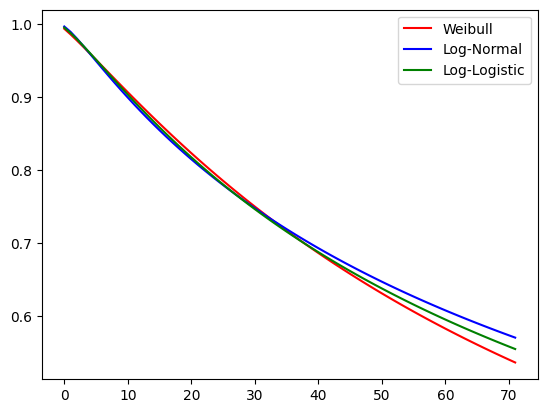

In [10]:
plt.plot(wb_avg, color = "red", label = "Weibull")
plt.plot(log_norm_avg, color = "blue", label = "Log-Normal")
plt.plot(log_lgstc_avg, color = 'green', label = 'Log-Logistic')
plt.legend()
plt.show()


# AIC



In [11]:
for i in [wb_fitter, log_norm_fitter, log_lgstc_fitter]:
    i.fit(durations = df["tenure"], event_observed = df["churn_Yes"])
    print(f"AIC {i.__class__.__name__}: {i.AIC_}")

AIC WeibullFitter: 3216.8611706815464
AIC LogNormalFitter: 3209.0351474316735
AIC LogLogisticFitter: 3214.4154757933375


The Akaike Information Criterion (AIC) helps us compare different statistical models. A lower AIC means a better model that fits well and isn't too complex.

Out of the models we looked at, the Log-Normal one has the lowest AIC (3209.04), which means it's the best balance between fitting well and being simple.

So, just going by AIC, we prefer the Log-Normal model over the others. But it's not just about AIC; we also need to think about whether the chosen model fits the data well and check its performance with other datasets if we can.

# BIC





In [12]:
for i in [wb_fitter, log_norm_fitter, log_lgstc_fitter]:
    i.fit(durations = df["tenure"], event_observed = df["churn_Yes"])
    print(f"BIC {i.__class__.__name__}: {i.BIC_}")

BIC WeibullFitter: 3226.676681239511
BIC LogNormalFitter: 3218.850657989638
BIC LogLogisticFitter: 3224.230986351302


The Bayesian Information Criterion (BIC) is similar to AIC and helps in choosing the right model. It's stricter on complex models compared to AIC. Lower BIC values mean a better balance between fitting well and being simple.

Once again, the Log-Normal model shows the lowest BIC value (3218.85), suggesting it's the best choice in balancing model fit and complexity among the three models.

Like with AIC, the Log-Normal model seems to be the best based on BIC values. It's good to look at both AIC and BIC, along with considering the assumptions of the chosen model, when deciding on the best model. Also, using cross-validation or other validation techniques can help confirm the model selection.

# Best Model(Log-Normal)

In [13]:
log_norm_aft.print_summary()

<lifelines.LogNormalAFTFitter: fitted with 1000 total observations, 726 right-censored observations>
             duration col = 'tenure'
                event col = 'churn_Yes'
   number of observations = 1000
number of events observed = 274
           log-likelihood = -1468.70
         time fit was run = 2024-04-29 11:36:40 UTC

---
                                         coef  exp(coef)   se(coef)   coef lower 95%   coef upper 95%  exp(coef) lower 95%  exp(coef) upper 95%
param  covariate                                                                                                                               
mu_    age                               0.05       1.05       0.01             0.04             0.07                 1.04                 1.07
       custcat_E-service                 1.13       3.10       0.17             0.79             1.47                 2.21                 4.35
       custcat_Plus service              0.95       2.60       0.22             0.52             1.39                 1.69                 4.00
       custcat_Total service             1.29       3.63       0.26             0.79             1.79                 2.20                 5.99
       ed_Did not complete high school   0.41       1.50       0.20             0.01             0.81                 1.01                 2.24
       ed_High school degree             0.35       1.42       0.17             0.02             0.68                 1.03                 1.97
       ed_Post-undergraduate degree     -0.01       0.99       0.23            -0.46             0.43                 0.63                 1.54
       ed_Some college                   0.29       1.33       0.17            -0.04             0.62                 0.96                 1.86
       forward_Yes                      -0.16       0.86       0.18            -0.52             0.20                 0.60                 1.22
       gender_Male                       0.04       1.04       0.12            -0.19             0.27                 0.83                 1.31
       income                            0.00       1.00       0.00            -0.00             0.00                 1.00                 1.00
       internet_Yes                     -0.82       0.44       0.15            -1.11            -0.53                 0.33                 0.59
       marital_Married                   0.43       1.54       0.12             0.20             0.66                 1.22                 1.94
       region_Zone 2                    -0.07       0.93       0.15            -0.36             0.21                 0.70                 1.24
       region_Zone 3                     0.05       1.06       0.14            -0.23             0.34                 0.80                 1.40
       retire_Yes                       -0.09       0.92       0.43            -0.93             0.76                 0.39                 2.13
       voice_Yes                        -0.50       0.61       0.17            -0.84            -0.16                 0.43                 0.85
       Intercept                         1.50       4.49       0.29             0.94             2.06                 2.56                 7.87
sigma_ Intercept                         0.30       1.35       0.05             0.21             0.39                 1.23                 1.48

                                         cmp to     z      p   -log2(p)
param  covariate                                                       
mu_    age                                 0.00  8.54 <0.005      56.00
       custcat_E-service                   0.00  6.53 <0.005      33.81
       custcat_Plus service                0.00  4.35 <0.005      16.14
       custcat_Total service               0.00  5.03 <0.005      20.97
       ed_Did not complete high school     0.00  1.99   0.05       4.43
       ed_High school degree               0.00  2.11   0.03       4.84
       ed_Post-undergraduate degree        0.00 -0.05   0.96  

Features with high p-values, which indicate non-significance, are candidates for removal from the model. This process is aimed at simplifying the model by keeping only the features that have a significant impact on predicting churn, as determined by statistical analysis. In this case, the following features are recommended for removal, along with their corresponding p-values:

ed_High school degree (p-value: 0.03)

ed_Did not complete high school (p-value: 0.05)

ed_Post-undergraduate degree (p-value: 0.06)

ed_Some college (p-value: 0.09)

income (p-value: 0.10)

forward_Yes (p-value: 0.39)

region_Zone 2 (p-value: 0.62)

region_Zone 3 (p-value: 0.71)

gender_Male (p-value: 0.74)

retire_Yes (p-value: 0.84)

The decision to remove these features is determined by their individual p-values, which suggest they lack statistical significance in forecasting churn.

In [14]:
df = df.drop(columns = ['ed_High school degree', 'ed_Did not complete high school', 'ed_Post-undergraduate degree', 'ed_Some college',
                       'income', 'forward_Yes', 'region_Zone 2','region_Zone 3',
                         'gender_Male', 'retire_Yes' ])
df.head()

,tenure,age,marital_Married,churn_Yes,voice_Yes,internet_Yes,custcat_E-service,custcat_Plus service,custcat_Total service
0,13,44,True,True,False,False,False,False,False
1,11,33,True,True,True,False,False,False,True
2,68,52,True,False,False,False,False,True,False
3,33,33,False,True,False,False,False,False,False
4,23,30,True,False,False,False,False,True,False


# Log-Normal Predictions

In [15]:
log_norm_aft = LogNormalAFTFitter()
log_norm_aft.fit(df, duration_col='tenure', event_col='churn_Yes')
log_norm_aft_pred = log_norm_aft.predict_survival_function(df).transpose()
log_norm_aft_pred.head()

,1.0,2.0,3.0,4.0,5.0,6.0,7.0,8.0,9.0,10.0,...,63.0,64.0,65.0,66.0,67.0,68.0,69.0,70.0,71.0,72.0
0,0.999702,0.998274,0.995688,0.992141,0.987825,0.982900,0.977494,0.971708,0.965623,0.959305,...,0.652253,0.647971,0.643737,0.639550,0.635410,0.631316,0.627266,0.623261,0.619300,0.615382
1,0.999676,0.998147,0.995398,0.991649,0.987106,0.981938,0.976280,0.970239,0.963899,0.957329,...,0.644020,0.639702,0.635434,0.631214,0.627042,0.622918,0.618840,0.614808,0.610820,0.606877
2,0.999995,0.999954,0.999848,0.999665,0.999397,0.999045,0.998608,0.998090,0.997493,0.996821,...,0.915821,0.914020,0.912220,0.910420,0.908620,0.906820,0.905022,0.903224,0.901428,0.899633
3,0.996065,0.984172,0.967919,0.949482,0.930032,0.910230,0.890464,0.870965,0.851871,0.833263,...,0.350440,0.346165,0.341976,0.337869,0.333843,0.329895,0.326023,0.322225,0.318500,0.314844
4,0.999757,0.998558,0.996344,0.993264,0.989479,0.985123,0.980310,0.975128,0.969650,0.963937,...,0.672582,0.668398,0.664257,0.660161,0.656107,0.652096,0.648126,0.644198,0.640311,0.636463


In [16]:
log_norm_aft.predict_hazard(df).transpose().head()

,1.0,2.0,3.0,4.0,5.0,6.0,7.0,8.0,9.0,10.0,...,63.0,64.0,65.0,66.0,67.0,68.0,69.0,70.0,71.0,72.0
0,0.000808,0.002039,0.003114,0.003992,0.004701,0.005275,0.005741,0.006121,0.006432,0.006688,...,0.006602,0.006571,0.006540,0.006510,0.006480,0.006450,0.006420,0.006390,0.006361,0.006332
1,0.000872,0.002176,0.003301,0.004213,0.004944,0.005533,0.006008,0.006393,0.006707,0.006964,...,0.006743,0.006711,0.006679,0.006647,0.006615,0.006584,0.006553,0.006522,0.006491,0.006461
2,0.000017,0.000070,0.000143,0.000225,0.000310,0.000395,0.000479,0.000559,0.000636,0.000710,...,0.001966,0.001970,0.001974,0.001977,0.001981,0.001984,0.001987,0.001990,0.001992,0.001994
3,0.008604,0.014792,0.018185,0.020101,0.021191,0.021789,0.022080,0.022175,0.022141,0.022020,...,0.012323,0.012225,0.012129,0.012034,0.011942,0.011851,0.011761,0.011674,0.011587,0.011503
4,0.000666,0.001730,0.002685,0.003481,0.004134,0.004671,0.005112,0.005477,0.005779,0.006031,...,0.006255,0.006227,0.006200,0.006173,0.006146,0.006119,0.006093,0.006066,0.006040,0.006014


In [17]:
log_norm_aft.print_summary()

<lifelines.LogNormalAFTFitter: fitted with 1000 total observations, 726 right-censored observations>
             duration col = 'tenure'
                event col = 'churn_Yes'
   number of observations = 1000
number of events observed = 274
           log-likelihood = -1474.07
         time fit was run = 2024-04-29 11:36:47 UTC

---
                               coef  exp(coef)   se(coef)   coef lower 95%   coef upper 95%  exp(coef) lower 95%  exp(coef) upper 95%
param  covariate                                                                                                                     
mu_    age                     0.06       1.06       0.01             0.05             0.07                 1.05                 1.07
       custcat_E-service       1.09       2.98       0.17             0.75             1.43                 2.12                 4.17
       custcat_Plus service    0.88       2.42       0.17             0.54             1.22                 1.72                 3.39
       custcat_Total service   1.13       3.10       0.21             0.71             1.55                 2.04                 4.72
       internet_Yes           -0.90       0.41       0.14            -1.17            -0.62                 0.31                 0.54
       marital_Married         0.42       1.53       0.12             0.19             0.65                 1.21                 1.92
       voice_Yes              -0.53       0.59       0.17            -0.86            -0.19                 0.42                 0.82
       Intercept               1.72       5.58       0.23             1.27             2.17                 3.54                 8.78
sigma_ Intercept               0.31       1.36       0.05             0.22             0.40                 1.24                 1.49

                               cmp to     z      p   -log2(p)
param  covariate                                             
mu_    age                       0.00 10.86 <0.005      88.85
       custcat_E-service         0.00  6.34 <0.005      32.05
       custcat_Plus service      0.00  5.10 <0.005      21.50
       custcat_Total service     0.00  5.28 <0.005      22.91
       internet_Yes              0.00 -6.36 <0.005      32.20
       marital_Married           0.00  3.62 <0.005      11.74
       voice_Yes                 0.00 -3.09 <0.005       8.98
       Intercept                 0.00  7.43 <0.005      43.02
sigma_ Intercept                 0.00  6.69 <0.005      35.35
---
Concordance = 0.77
AIC = 2966.13
log-likelihood ratio test = 256.90 on 7 df
-log2(p) of ll-ratio test = 169.51

#Churn Analysis Results Report

**Age**

Coefficient: 0.06

Interpretation: For each additional year of age, the customer is 1.06 times more likely to churn.

Explanation: Older customers might switch to different services or providers because their needs, preferences, or technology change.

**Customer Category (E-service)**

Coefficient: 1.09

Interpretation: Customers in the E-service category are 2.98 times more likely to churn compared to the reference category.

Explanation: Customers who use E-services might not engage with the service as much, which could make them more likely to stop using it.

**Customer Category (Plus Service)**

Coefficient: 0.88

Interpretation: Customers in the Plus service category are 2.42 times more likely to churn compared to the reference category.

Explanation: Customers using the Plus service may have higher expectations and may be more affected by price changes or service interruptions, making them more likely to stop using the service.

**Customer Category (Total Service)**

Coefficient: 1.13

Interpretation: Customers in the Total service category are 3.10 times more likely to churn compared to the reference category.

Explanation: Customers in the Total service category might have more choices available to them, which could increase the likelihood of them switching to a competitor.

**Internet Access**

Coefficient: -0.90

Interpretation: Customers with internet access are 0.41 times less likely to churn compared to those without internet access.

Explanation:  Internet access can improve the overall service experience and get customers more involved, which can lower the chances of them stopping to use the service.

**Marital Status (Married)**

Coefficient: 0.42

Interpretation: Married customers are 1.53 times less likely to churn compared to single customers.

Explanation: Married couples, who share responsibilities and make decisions together, may be less likely to make sudden choices, such as switching providers.

**Voice Service**

Coefficient: -0.53

Interpretation: Customers with voice service are 0.59 times less likely to churn compared to those without voice service.

Explanation: Voice service offers a more personalized and interactive experience, which can build customer loyalty and decrease the likelihood of them leaving.

**Intercept**

Coefficient: 1.72

Interpretation: This represents the baseline log hazard of churn for the reference category, which is assumed to have all covariates set to zero.

Explanation: The intercept helps to give context to the impact of the other factors being considered.

**Standard Deviation (Sigma)**

Coefficient: 0.31

Interpretation: This represents the standard deviation of the log hazard, indicating the variability in churn rates across customers.

Explanation: A higher sigma value indicates greater variability in churn behavior among customers.

#Identifying Valuable Segments

Identifying valuable segments involves examining the factors that notably influence the churn rate.

The variables custcat_E-service, custcat_Plus service, and custcat_Total service show the most significant positive correlations with the log hazard of churn. This indicates that customers in these categories are more likely to churn and should be the focus of retention strategies.

The variables internet_Yes, marital_Married, and voice_Yes exhibit notable negative correlations with the log hazard of churn, suggesting that these factors help protect against churn. Customers with these attributes should be identified as valuable segments and could be eligible for rewards or loyalty programs to encourage them to continue using the service.

#CLV


lets assume that discount rate is 10% and average monthly margin is 1500 AMD.

In [18]:
MM = 1500
sequence = range(1,len(log_norm_aft_pred.columns)+1)
r = 0.1

for num in sequence:
    log_norm_aft_pred.loc[:,num] = log_norm_aft_pred.loc[:,num]/((1+r/12)**(sequence[num-1]-1))

log_norm_aft_pred.head()

,1.0,2.0,3.0,4.0,5.0,6.0,7.0,8.0,9.0,10.0,...,63.0,64.0,65.0,66.0,67.0,68.0,69.0,70.0,71.0,72.0
0,0.999702,0.990024,0.979298,0.967745,0.955572,0.942950,0.930014,0.916868,0.903597,0.890266,...,0.389906,0.384145,0.378481,0.372912,0.367436,0.362051,0.356756,0.351549,0.346428,0.341391
1,0.999676,0.989897,0.979014,0.967265,0.954876,0.942027,0.928859,0.915482,0.901984,0.888432,...,0.384985,0.379243,0.373599,0.368051,0.362597,0.357235,0.351964,0.346780,0.341684,0.336673
2,0.999995,0.991690,0.983390,0.975084,0.966767,0.958439,0.950102,0.941761,0.933419,0.925082,...,0.547463,0.541871,0.536334,0.530852,0.525424,0.520050,0.514729,0.509461,0.504246,0.499083
3,0.996065,0.976039,0.951987,0.926135,0.899666,0.873234,0.847211,0.821811,0.797152,0.773295,...,0.209487,0.205222,0.201063,0.197006,0.193050,0.189191,0.185425,0.181750,0.178164,0.174663
4,0.999757,0.990306,0.979943,0.968841,0.957172,0.945083,0.932693,0.920095,0.907365,0.894565,...,0.402059,0.396255,0.390546,0.384930,0.379404,0.373968,0.368620,0.363358,0.358180,0.353086


In [19]:
log_norm_aft_pred["CLV"] = MM * log_norm_aft_pred.sum(axis = 1)
log_norm_aft_pred.head()

,1.0,2.0,3.0,4.0,5.0,6.0,7.0,8.0,9.0,10.0,...,64.0,65.0,66.0,67.0,68.0,69.0,70.0,71.0,72.0,CLV
0,0.999702,0.990024,0.979298,0.967745,0.955572,0.942950,0.930014,0.916868,0.903597,0.890266,...,0.384145,0.378481,0.372912,0.367436,0.362051,0.356756,0.351549,0.346428,0.341391,66750.977945
1,0.999676,0.989897,0.979014,0.967265,0.954876,0.942027,0.928859,0.915482,0.901984,0.888432,...,0.379243,0.373599,0.368051,0.362597,0.357235,0.351964,0.346780,0.341684,0.336673,66322.457232
2,0.999995,0.991690,0.983390,0.975084,0.966767,0.958439,0.950102,0.941761,0.933419,0.925082,...,0.541871,0.536334,0.530852,0.525424,0.520050,0.514729,0.509461,0.504246,0.499083,78693.368816
3,0.996065,0.976039,0.951987,0.926135,0.899666,0.873234,0.847211,0.821811,0.797152,0.773295,...,0.205222,0.201063,0.197006,0.193050,0.189191,0.185425,0.181750,0.178164,0.174663,48311.320755
4,0.999757,0.990306,0.979943,0.968841,0.957172,0.945083,0.932693,0.920095,0.907365,0.894565,...,0.396255,0.390546,0.384930,0.379404,0.373968,0.368620,0.363358,0.358180,0.353086,67794.166467


In [20]:
log_norm_aft_pred.describe()

,1.0,2.0,3.0,4.0,5.0,6.0,7.0,8.0,9.0,10.0,...,64.0,65.0,66.0,67.0,68.0,69.0,70.0,71.0,72.0,CLV
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,...,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000
mean,0.996719,0.981092,0.963964,0.946306,0.928568,0.910981,0.893670,0.876703,0.860117,0.843929,...,0.354520,0.349539,0.344643,0.339831,0.335100,0.330448,0.325874,0.321377,0.316954,62184.394829
std,0.009677,0.023567,0.036881,0.049075,0.060116,0.070086,0.079088,0.087222,0.094581,0.101245,...,0.142905,0.142029,0.141144,0.140250,0.139348,0.138439,0.137524,0.136603,0.135677,14367.082064
min,0.855653,0.703697,0.590533,0.504518,0.437243,0.383329,0.339253,0.302626,0.271771,0.245477,...,0.013735,0.013258,0.012803,0.012366,0.011948,0.011547,0.011162,0.010793,0.010439,12100.614249
25%,0.997393,0.980660,0.960461,0.938454,0.915604,0.892490,0.869465,0.846748,0.824478,0.802738,...,0.235656,0.231131,0.226712,0.222395,0.218177,0.214056,0.210029,0.206093,0.202245,51932.288775
50%,0.999575,0.989404,0.977916,0.965435,0.952242,0.938556,0.924542,0.910327,0.896009,0.881662,...,0.362325,0.356761,0.351296,0.345926,0.340652,0.335469,0.330378,0.325375,0.320458,64815.481930
75%,0.999954,0.991405,0.982604,0.973556,0.964288,0.954835,0.945231,0.935508,0.925693,0.915813,...,0.477044,0.471245,0.465520,0.459869,0.454289,0.448781,0.443343,0.437975,0.432675,74216.604457
max,1.000000,0.991735,0.983537,0.975404,0.967335,0.959329,0.951385,0.943501,0.935678,0.927914,...,0.586425,0.581385,0.576386,0.571428,0.566511,0.561634,0.556797,0.552000,0.547242,81325.896274


In [21]:
telco["CLV"] = log_norm_aft_pred["CLV"]
telco.head()

,ID,region,tenure,age,marital,address,income,ed,retire,gender,voice,internet,forward,custcat,churn,CLV
0,1,Zone 2,13,44,Married,9,64,College degree,No,Male,No,No,Yes,Basic service,Yes,66750.977945
1,2,Zone 3,11,33,Married,7,136,Post-undergraduate degree,No,Male,Yes,No,Yes,Total service,Yes,66322.457232
2,3,Zone 3,68,52,Married,24,116,Did not complete high school,No,Female,No,No,No,Plus service,No,78693.368816
3,4,Zone 2,33,33,Unmarried,12,33,High school degree,No,Female,No,No,No,Basic service,Yes,48311.320755
4,5,Zone 2,23,30,Married,9,30,Did not complete high school,No,Male,No,No,Yes,Plus service,No,67794.166467


# CLV (according to different categorical features) - within different segments

,CLV
region,
Zone 1,62315.101976
Zone 2,62890.317995
Zone 3,61376.644716


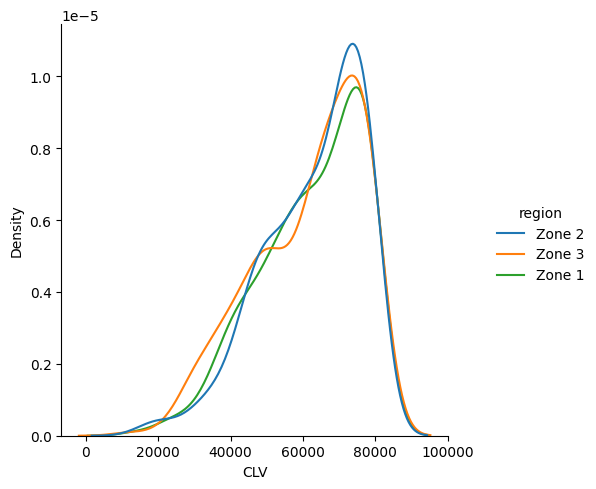

In [22]:
sns.displot(data=telco, kind='kde', x='CLV', hue='region')
telco.groupby("region")[["CLV"]].mean()

,CLV
marital,
Married,65530.756677
Unmarried,58904.297572


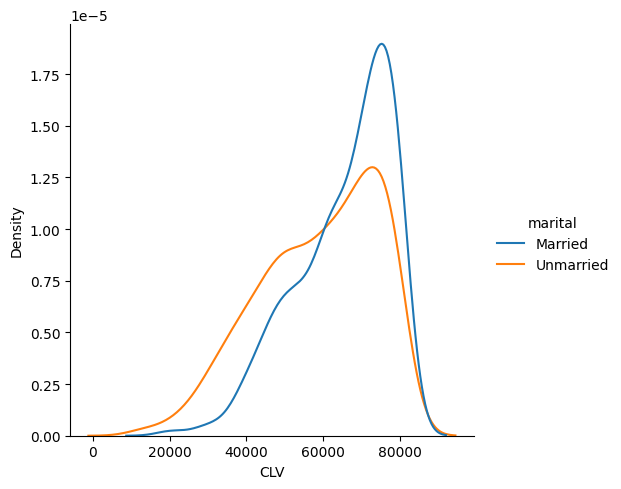

In [23]:
sns.displot(data=telco, kind='kde', x='CLV', hue='marital')
telco.groupby("marital")[["CLV"]].mean()

,CLV
ed,
College degree,58153.450747
Did not complete high school,67937.689215
High school degree,63687.142233
Post-undergraduate degree,57306.857441
Some college,60558.547092


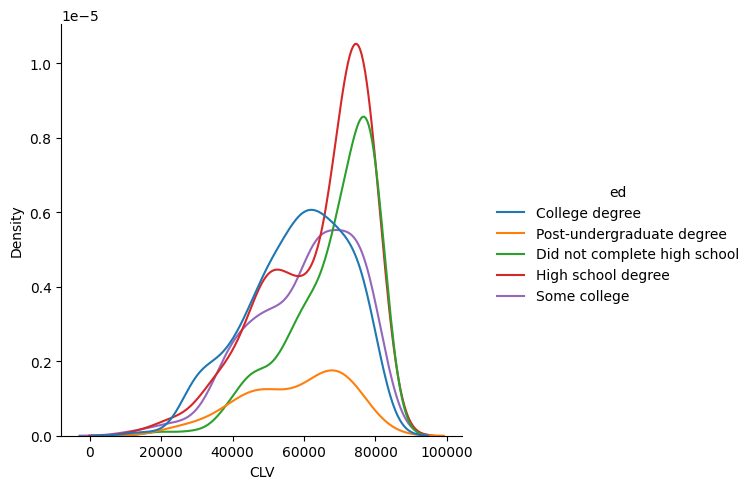

In [24]:
sns.displot(data=telco, kind='kde', x='CLV', hue='ed')
telco.groupby("ed")[["CLV"]].mean()

,CLV
retire,
No,61377.680576
Yes,78541.813617


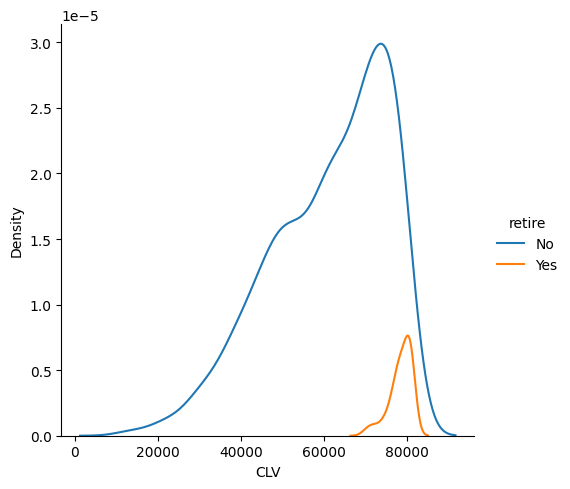

In [25]:
sns.displot(data=telco, kind='kde', x='CLV', hue='retire')
telco.groupby("retire")[["CLV"]].mean()

,CLV
gender,
Female,61963.109240
Male,62421.257457


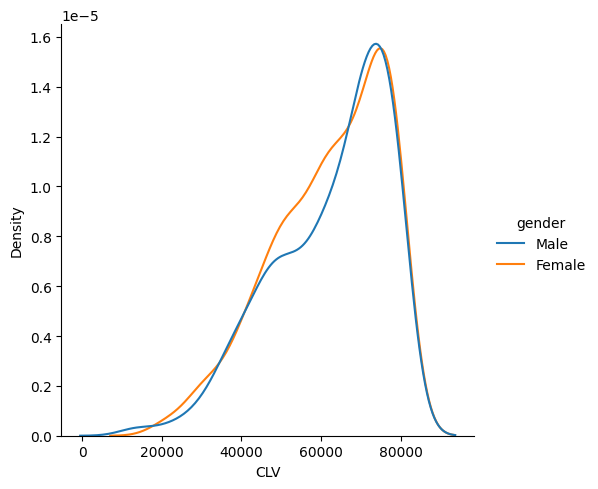

In [26]:
sns.displot(data=telco, kind='kde', x='CLV', hue='gender')
telco.groupby("gender")[["CLV"]].mean()

,CLV
voice,
No,64260.290740
Yes,57431.685769


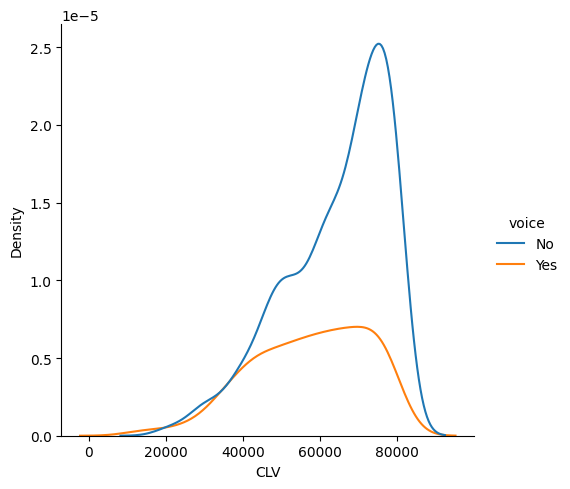

In [27]:
sns.displot(data=telco, kind='kde', x='CLV', hue='voice')
telco.groupby("voice")[["CLV"]].mean()

,CLV
internet,
No,67405.534453
Yes,53217.655040


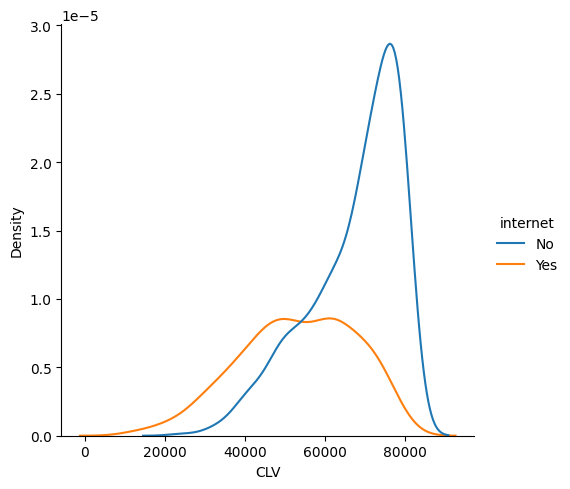

In [28]:
sns.displot(data=telco, kind='kde', x='CLV', hue='internet')
telco.groupby("internet")[["CLV"]].mean()

,CLV
forward,
No,59990.816818
Yes,64440.265116


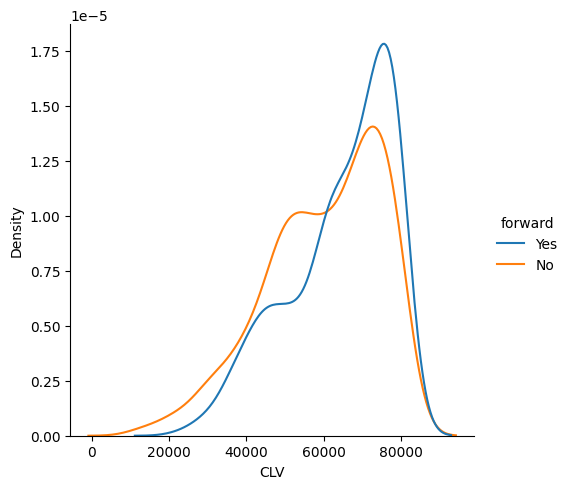

In [29]:
sns.displot(data=telco, kind='kde', x='CLV', hue='forward')
telco.groupby("forward")[["CLV"]].mean()

,CLV
custcat,
Basic service,52792.405201
E-service,67009.438426
Plus service,70489.982146
Total service,58444.414932


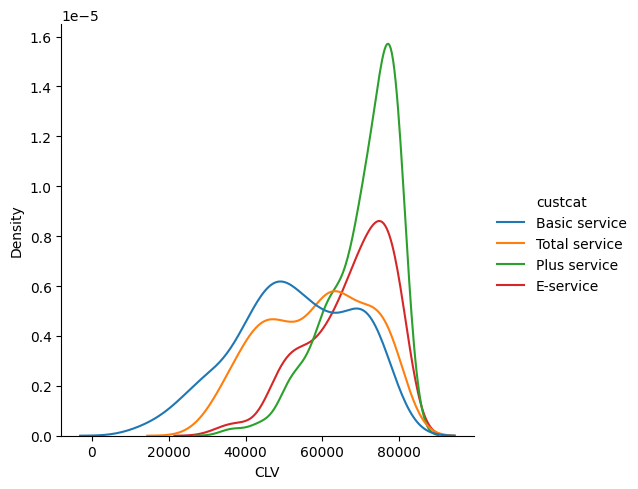

In [30]:
sns.displot(data=telco, kind='kde', x='CLV', hue='custcat')
telco.groupby("custcat")[["CLV"]].mean()

,CLV
churn,
No,65168.610963
Yes,54277.311203


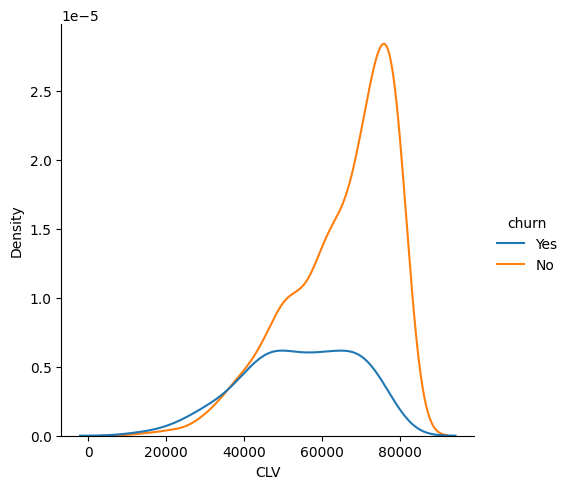

In [31]:
sns.displot(data=telco, kind='kde', x='CLV', hue='churn')
telco.groupby("churn")[["CLV"]].mean()

# Assuming the data represents the population, how much would be your annual retention budget? Report

In [32]:
telco['churn'] = telco['churn'].map({'Yes': 1, 'No': 0})

#Determine Survival Probabilities using Kaplan-Meier estimator
kmf = KaplanMeierFitter()
kmf.fit(durations=telco['tenure'], event_observed=telco['churn'])
survival_probabilities = kmf.survival_function_at_times(telco['tenure']).reset_index()
survival_probabilities.columns = ['tenure', 'survival_probability']

# Merge Survival Probabilities with the original DataFrame
telco = pd.merge(telco, survival_probabilities, on='tenure')

#Identify At-Risk Subscribers
at_risk_threshold = 0.5  # Arbitrary threshold based on business needs
at_risk_subscribers = telco[telco['churn'] > at_risk_threshold]

#Estimate Retention Budget
total_retention_budget = (at_risk_subscribers['CLV'] * at_risk_subscribers['survival_probability']).sum()

print(f"Estimated Annual Retention Budget: {total_retention_budget:.2f}")

Estimated Annual Retention Budget: 188157457.95


# Some suggestions for retention Report

**Loyalty Programs**

Set up loyalty programs that give rewards to customers who keep coming back.(discounts, points, etc)



**Customer Segmentation**

Segment customer based on different factors such as demographics, preferences, and many other.
This helps customize retention plans for different customer segments.

**Personalization**

Tailor messages and options to match what each customer likes. For this, using data analytics can help understand each customer's needs and preferences